# Experiment of our program in a real quantum computer

In [15]:
import sys 
sys.path.append('../')

import itertools
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from qiskit import IBMQ
from qiskit.algorithms.optimizers import SPSA
from quantum_neural_networks import StateDiscriminativeQuantumNeuralNetworks as nnd, QuantumState 

plt.style.use('ggplot')

In [16]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-csic', group='internal', project='iff-csic')
name_backend = 'ibmq_casablanca'
backend = provider.get_backend(name_backend)

ibmqfactory.load_account:WARNING:2021-11-17 11:52:13,423: Credentials are already in use. The existing account in the session will be replaced.


In [17]:
def callback(params, results, prob_error, prob_inc, prob):
    datos.append(prob_error)

In [4]:
# Create random states
ψ = QuantumState.random(1)
ϕ = QuantumState.random(1)

# Parameters
th_u, fi_u, lam_u = [0], [0], [0]
th1, th2 = [0], [pi]
th_v1, th_v2 = [0], [0]
fi_v1, fi_v2 = [0], [0]
lam_v1, lam_v2 = [0], [0]
params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))

# Initialize Discriminator
discriminator = nnd([ψ, ϕ], backend=backend)
datos = []
results = discriminator.discriminate(SPSA(100), params, callback=callback)
optimal = nnd.helstrom_bound(ψ, ϕ)

C:\Users\lucia\miniconda3\lib\site-packages\qiskit\transpiler\runningpassmanager.py:166: UserWarning: Resynthesized 


and got


but the original was native (for ['id', 'rz', 'sx', 'x', 'cx', 'reset']) and the new value is longer.  This indicates an efficiency bug in synthesis.  Please report it by opening an issue here: https://github.com/Qiskit/qiskit-terra/issues/new/choose
  new_dag = pass_.run(dag)
C:\Users\lucia\miniconda3\lib\site-packages\qiskit\transpiler\runningpassmanager.py:166: UserWarning: Resynthesized 


and got


but the original was native (for ['id', 'rz', 'sx', 'x', 'cx', 'reset']) and the new value is longer.  This indicates an efficiency bug in synthesis.  Please report it by opening an issue here: https://github.com/Qiskit/qiskit-terra/issues/new/choose
  new_dag = pass_.run(dag)
C:\Users\lucia\miniconda3\lib\site-packages\qiskit\transpiler\runningpassmanager.py:166: UserWarning: Resynthesized 


and got


but the original was native (for ['id', 'rz', 'sx', 'x', 

In [5]:
print(optimal, results)

0.11460701822254743 (array([ 1.70020803, -0.55551791, -0.20638267,  0.1909003 ,  3.07159161,
        0.60059773, -0.28617368, -0.44059459,  0.16942399,  0.19259544,
       -1.14947208]), 0.17138671875, 200)


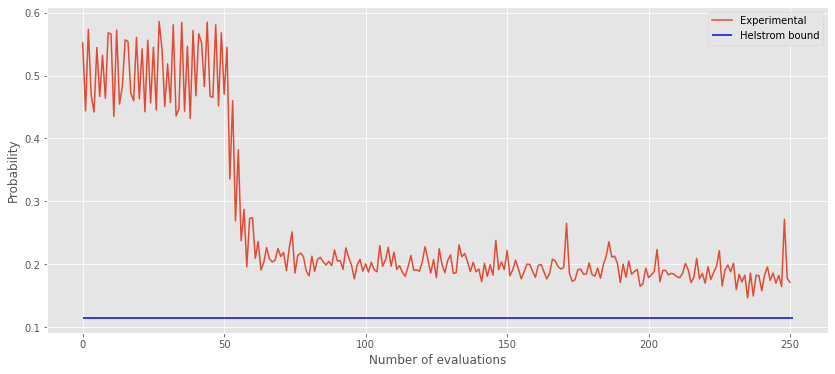

In [12]:
fig = plt.figure(figsize=(14, 6))
plt.plot(datos, '-')
plt.hlines( optimal, 0, len(datos), 'b')
plt.xlabel('Number of evaluations')
plt.ylabel('Probability')
plt.legend(['Experimental', 'Helstrom bound'])
plt.show()

In [13]:
np.save('Experimental_data_v2', np.array([ ψ, ϕ, results, optimal, datos ], dtype=object))

In [14]:
fig.savefig('experiment.png')